In [160]:
# Imports
import numpy as np
import random
import math
import matplotlib.pyplot as plt

# Define sample functions for Stake and Roobet
def sampleStake():
    return max(1,2**32/(random.randint(1,2**32))*0.99)

def sampleRoobet():
    e = 2**52
    h = random.randint(0,2**52-1)
    return 1 if h%25 == 0 else math.floor((100*e-h)/(e-h))/100.0

In [161]:
# Perform sampling, with samples size n
n = 1000000
stake_samples = np.array(sorted([sampleStake() for i in range(n)]))
roobet_samples = np.array(sorted([sampleRoobet() for i in range(n)]))

In [162]:
# Compute the analytical CDF and the sampled CDF for a selected range of crash point values
# Compute the sampled return rates of a simple betting strategy over n games
start = 1
end = 10
x_values = np.arange(start,end,0.01)
j = 0
k = 0
p1 = 0.01
hs = 0.04
p2 = 0.01
stake_emperical_cdf = np.zeros(len(x_values))
roobet_emperical_cdf = np.zeros(len(x_values))
stake_analytical_cdf = np.zeros(len(x_values))
roobet_analytical_cdf = np.zeros(len(x_values))
no_edge_cdf = np.zeros(len(x_values))
stake_return = np.zeros(len(x_values))
stake_dev = np.zeros(len(x_values))
roobet_return = np.zeros(len(x_values))
roobet_dev = np.zeros(len(x_values))
for i,x in enumerate(x_values):
    while j < len(stake_samples) and stake_samples[j] <= x:
        j += 1
    while k < len(roobet_samples) and roobet_samples[k] <= x:
        k += 1
    stake_emperical_cdf[i] = j/n
    roobet_emperical_cdf[i] = k/n
    stake_analytical_cdf[i] = 1 - (1-p1)/x
    roobet_analytical_cdf[i] = hs + (1-hs)*(1-(1-p1)/x)
    stake_return[i] = x*(1 - stake_emperical_cdf[i])
    stake_dev[i] = math.sqrt(x*(1-p1) - (1-p1)*(1-p1))/math.sqrt(n)
    roobet_return[i] = x*(1 - roobet_emperical_cdf[i])
    roobet_dev[i] = math.sqrt(x*(1-hs)*(1-p2) - (1-hs)*(1-p2)*(1-hs)*(1-p2))/math.sqrt(n)
    no_edge_cdf[i] = 1-1/x

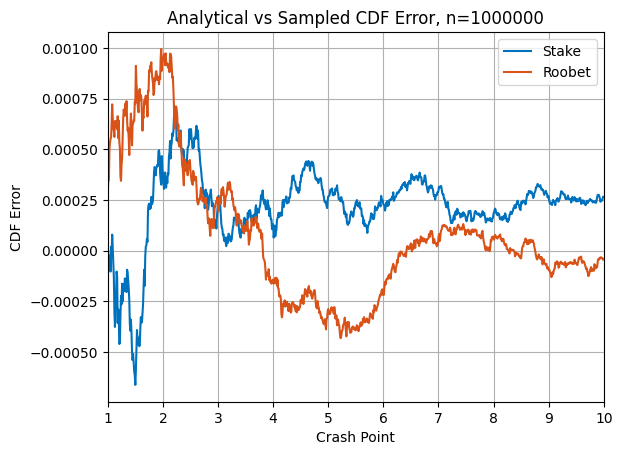

In [169]:
plt.plot(x_values, stake_emperical_cdf - stake_analytical_cdf, label = 'Stake', color = "#0072BD")
plt.plot(x_values, roobet_emperical_cdf - roobet_analytical_cdf, label = 'Roobet', color = "#D95319")
plt.title(f'Analytical vs Sampled CDF Error, n={n}')
plt.xlim([start,end])
plt.xlabel('Crash Point')
plt.ylabel('CDF Error')
plt.grid(visible=True)
plt.legend()
plt.savefig('modelled_cdf_errors.png', dpi=600)

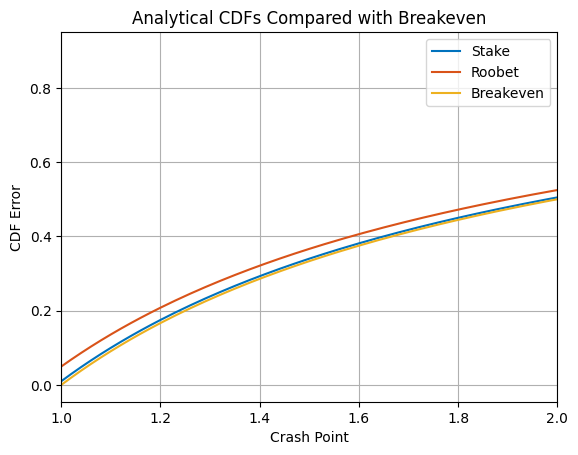

In [171]:
plt.plot(x_values, stake_analytical_cdf, label = 'Stake', color = "#0072BD")
plt.plot(x_values, roobet_analytical_cdf, label = 'Roobet', color = "#D95319")
plt.plot(x_values, no_edge_cdf, label = 'Breakeven', color = "#EDB120")
plt.title(f'Analytical CDFs Compared with Breakeven')
plt.xlim([start,2])
plt.xlabel('Crash Point')
plt.ylabel('CDF Error')
plt.grid(visible=True)
plt.legend()
plt.savefig('analytical_cdfs_breakeven.png', dpi=600)

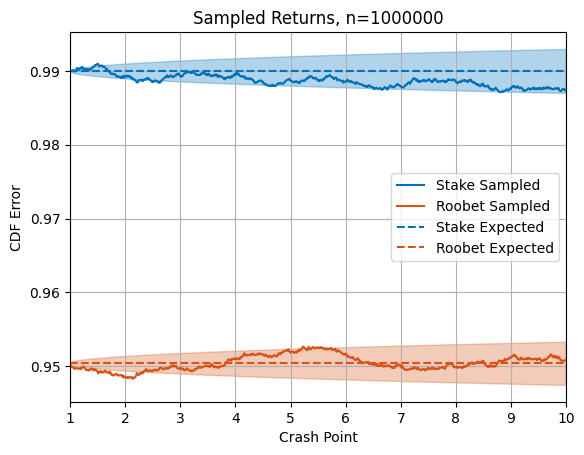

In [172]:
stake_expected = (1-p1)*np.ones(x_values.shape)
roobet_expected = (1-hs)*(1-p2)*np.ones(x_values.shape)
plt.plot(x_values, stake_return, label = 'Stake Sampled', color = "#0072BD")
plt.plot(x_values, roobet_return, label = 'Roobet Sampled', color = "#D95319")
plt.plot(x_values, stake_expected, '--', label = 'Stake Expected', color = "#0072BD")
plt.fill_between(x_values, stake_expected-stake_dev, stake_expected+stake_dev, alpha=0.3, color = "#0072BD")
plt.plot(x_values, roobet_expected, '--', label = 'Roobet Expected', color = "#D95319")
plt.fill_between(x_values, roobet_expected-roobet_dev, roobet_expected+roobet_dev, alpha=0.3, color = "#D95319")
plt.title(f'Sampled Returns, n={n}')
plt.xlim([start,end])
plt.xlabel('Crash Point')
plt.ylabel('CDF Error')
plt.legend()
plt.grid(visible=True)
plt.savefig('sampled_returns.png', dpi=600)